In [59]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting functionality


In [34]:
# Read csv into pandas df (dataset obtained from Kaggle)
# https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering

data = pd.read_csv('wine-clustering.csv')
df = data.copy() #create a copy of the dataset incase we require the original
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [35]:
df.info() #no non-nulls and datatypes are all int or float
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## K-Means Clustering

K-Means is an unsupervised learning algorithm that aims to group data based on similarity. Here's how it works:

1. **Algorithm Overview**:
   - Randomly assigns each data point to one of the K clusters.
   - Calculates centroids for each cluster.
   - Iteratively:
     - Evaluates each observation, assigning it to the closest cluster based on the Euclidean distance to the centroid.
     - Recalculates centroids when a cluster gains or loses a data point.
     - Repeats until no further reassignments occur.
   - The goal is to minimize the within-cluster variance (sum of squared distances from data points to their cluster centroids).

2. **Strengths**:
   - Simple and efficient.
   - Works well when clusters are roughly spherical and well-separated.

3. **Limitations**:
   - Sensitive to initial centroid placement.
   - Assumes equally sized and spherical clusters.

4. **Applications**:
   - Customer segmentation.
   - Image compression.
   - Anomaly detection.

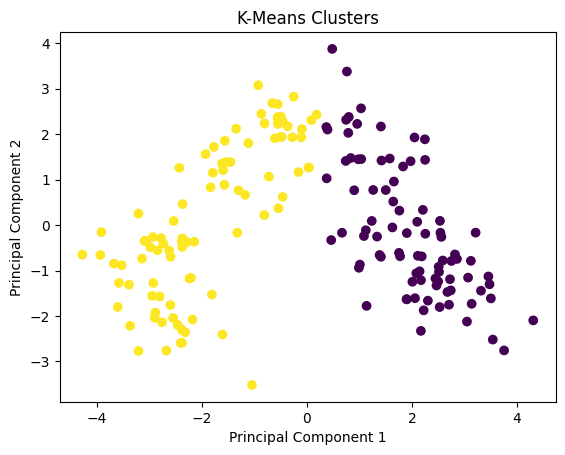

In [69]:
# Remove any non-numeric columns (if needed)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Standardise the features (mean - 0, std - 1)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)

# Choose the number of clusters (K)
k = 2

# Instantiate the K-Means class
# init="random": Initializes cluster centroids randomly.
# n_clusters=k: Specifies the number of clusters.
# n_init=10: Number of times K-Means will be run with different initial centroids (to avoid local minima).
# random_state=1: Ensures reproducibility.
kmeans = KMeans(init="random", n_clusters=k, n_init=10, random_state=1)

# Fit K-Means algorithm to data
kmeans.fit(scaled_df)

# View cluster assignments for each observation
cluster_labels = kmeans.labels_
df['Cluster'] = cluster_labels

# Visualise the results
# We use Principal Component Analysis (PCA) to reduce the dimensionality of the data to 2D.
# The scatter plot shows the data points colored by their assigned clusters.

pca = PCA(n_components=2)
reduced_df = pca.fit_transform(scaled_df)

plt.scatter(reduced_df[:, 0], reduced_df[:, 1], c=cluster_labels, cmap='viridis')
plt.title("K-Means Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()



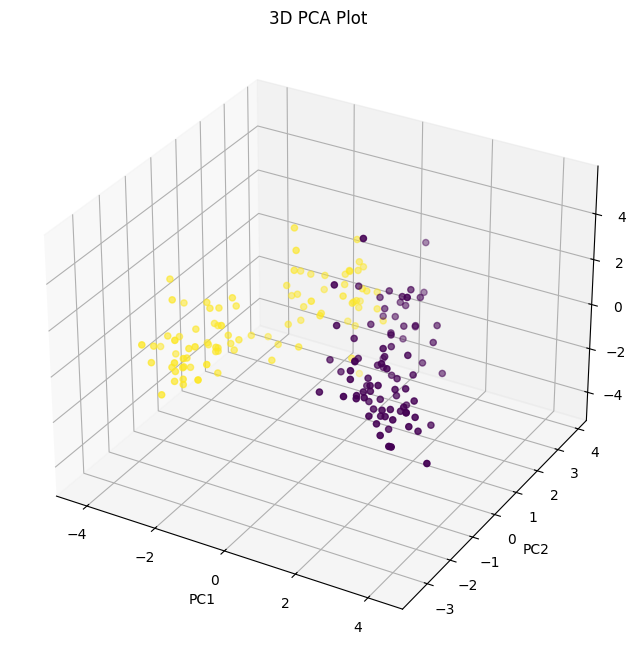

In [70]:
# Assuming you have already loaded your wine dataset into the 'df' DataFrame

# Remove any non-numeric columns (if needed)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Standardise the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)

# Perform PCA with 3 components
pca = PCA(n_components=3)
pca.fit(scaled_df)
pca_results = pca.transform(scaled_df)

# Set up a 3D plotting environment
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assign PCA features to their own axes
Xax = pca_results[:, 0]
Yax = pca_results[:, 1]
Zax = pca_results[:, 2]

# Create the 3D scatter plot
ax.scatter(Xax, Yax, Zax, c=cluster_labels, cmap='viridis')
ax.set_title("3D PCA Plot")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()


In [68]:


def evaluate_kmeans(X, k):
    """
    Evaluate K-means clustering with a given K.

    Args:
        X (array-like): Input data (features).
        k (int): Number of clusters.

    Returns:
        float: Silhouette score for the given K.
    """
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    return silhouette_avg



silhouette_scores = []

for k_value in range(2, 100):
    silhouette_score_k = evaluate_kmeans(numeric_df, k_value)
    silhouette_scores.append({'k': k_value, 'silhouette_score': silhouette_score_k})

# Convert the list to a DataFrame
silhouettescores = pd.DataFrame(silhouette_scores)

# Print the first few rows of the DataFrame
print(silhouettescores.head())

# Assuming you have already computed the silhouette scores and stored them in 'silhouettescores'
# Replace 'silhouettescores' with your actual DataFrame

# Find the row with the highest silhouette score
best_k_row = silhouettescores.loc[silhouettescores['silhouette_score'].idxmax()]

# Extract the K value
best_k = best_k_row['k']

print(f"The K value with the highest silhouette score is K={best_k}.")



   k  silhouette_score
0  2          0.656854
1  3          0.559582
2  4          0.566948
3  5          0.508180
4  6          0.542155
The K value with the highest silhouette score is K=2.0.


In [71]:
!pip install --upgrade nbformat
!pip install --upgrade nbconvert
